In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
pwd

'/Users/maxwell/Documents/CMU/Courses/Mini 5/ML Capstone/ML-Capstone/Code'

In [4]:
data = pd.read_csv('../data/train_weekly.csv')
test_data = pd.read_csv('../data/test_weekly.csv')
data.Time = pd.to_datetime(data.Time)
test_data.Time = pd.to_datetime(test_data.Time)
# data = data.iloc[::-1].reset_index(drop = True)
# test_data = test_data.iloc[::-1].reset_index(drop = True)

In [5]:
data.drop(['Unnamed: 0'], axis = 1, inplace=True)
test_data.drop(['Unnamed: 0'], axis = 1, inplace=True)

In [6]:
data.columns

Index(['Time', 'AM_NetPos', 'FedFunds', '1Y OIS', 'Libor 3 mo', 'Libor 6 mo',
       'Libor 1Y', 'T10Y3M', 'T10Y2Y', 'T10YIE', 'JNK_Price', 'SPX',
       'WILL5000INDFC', 'NASDAQCOM', 'GOLD_price', 'VIX', 'VXVCLS', 'GVZCLS',
       'JPY', 'EUR', 'USDX_Close', 'DTWEXBGS', 'FF_Mkt', 'FF_SMB', 'FF_HML',
       'FF_MOM', 'Signal', 'Lev_NetPos', 'AM_n_L', 'AM_n_S', 'Lev_n_L',
       'Lev_n_S', 'AM_L', 'AM_S', 'Lev_L', 'Lev_S', 'SPY Flows', 'IVV',
       'JNK_Volume', 'Flag'],
      dtype='object')

In [7]:
test_data.columns

Index(['Time', 'AM_NetPos', 'FedFunds', '1Y OIS', 'Libor 3 mo', 'Libor 6 mo',
       'Libor 1Y', 'T10Y3M', 'T10Y2Y', 'T10YIE', 'JNK_Price', 'SPX',
       'WILL5000INDFC', 'NASDAQCOM', 'GOLD_price', 'VIX', 'VXVCLS', 'GVZCLS',
       'JPY', 'EUR', 'USDX_Close', 'DTWEXBGS', 'FF_Mkt', 'FF_SMB', 'FF_HML',
       'FF_MOM', 'Signal', 'Lev_NetPos', 'AM_n_L', 'AM_n_S', 'Lev_n_L',
       'Lev_n_S', 'AM_L', 'AM_S', 'Lev_L', 'Lev_S', 'SPY Flows', 'IVV',
       'JNK_Volume', 'Flag'],
      dtype='object')

<AxesSubplot:>

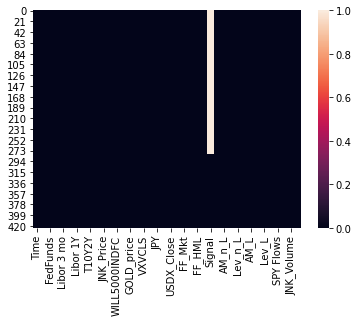

In [8]:
sns.heatmap(data.isnull())

In [9]:
lag = ['AM_n_L', 'AM_n_S', 'Lev_n_L', 'Lev_n_S', 'AM_L', 'AM_S',
       'Lev_L', 'Lev_S','Lev_NetPos']

In [10]:
data[lag] = data[lag].shift(1)
test_data[lag] = test_data[lag].shift(1)

In [11]:
data.drop(['Signal', 'Flag'], axis = 1, inplace = True)
test_data.drop(['Signal', 'Flag'], axis = 1, inplace = True)

In [12]:
data = data.dropna().reset_index(drop = True)
test_data = test_data.dropna().reset_index(drop = True)

In [13]:
p = len(data.columns)
p

38

In [14]:
data.columns

Index(['Time', 'AM_NetPos', 'FedFunds', '1Y OIS', 'Libor 3 mo', 'Libor 6 mo',
       'Libor 1Y', 'T10Y3M', 'T10Y2Y', 'T10YIE', 'JNK_Price', 'SPX',
       'WILL5000INDFC', 'NASDAQCOM', 'GOLD_price', 'VIX', 'VXVCLS', 'GVZCLS',
       'JPY', 'EUR', 'USDX_Close', 'DTWEXBGS', 'FF_Mkt', 'FF_SMB', 'FF_HML',
       'FF_MOM', 'Lev_NetPos', 'AM_n_L', 'AM_n_S', 'Lev_n_L', 'Lev_n_S',
       'AM_L', 'AM_S', 'Lev_L', 'Lev_S', 'SPY Flows', 'IVV', 'JNK_Volume'],
      dtype='object')

## Baseline

In [15]:
time_periods = data['Time']
X_train = data.iloc[:,2:p-2]
y_train = data.iloc[:,1]

X_test = test_data.iloc[:,2:p-2]
y_test = test_data.iloc[:,1]

#### Standardization

In [16]:
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error, mean_absolute_error
scaler = StandardScaler()
scaler.fit(X_train)
X_train_std = scaler.transform(X_train)
X_test_std = scaler.transform(X_test)

#### Ridge

In [17]:
from sklearn.linear_model import Ridge, RidgeCV
ridge = RidgeCV(alphas = np.linspace(0.1,1,100))
ridge.fit(X_train_std, y_train)

RidgeCV(alphas=array([0.1       , 0.10909091, 0.11818182, 0.12727273, 0.13636364,
       0.14545455, 0.15454545, 0.16363636, 0.17272727, 0.18181818,
       0.19090909, 0.2       , 0.20909091, 0.21818182, 0.22727273,
       0.23636364, 0.24545455, 0.25454545, 0.26363636, 0.27272727,
       0.28181818, 0.29090909, 0.3       , 0.30909091, 0.31818182,
       0.32727273, 0.33636364, 0.34545455, 0.35454545, 0.36363636,
       0.37272727, 0.381818...
       0.69090909, 0.7       , 0.70909091, 0.71818182, 0.72727273,
       0.73636364, 0.74545455, 0.75454545, 0.76363636, 0.77272727,
       0.78181818, 0.79090909, 0.8       , 0.80909091, 0.81818182,
       0.82727273, 0.83636364, 0.84545455, 0.85454545, 0.86363636,
       0.87272727, 0.88181818, 0.89090909, 0.9       , 0.90909091,
       0.91818182, 0.92727273, 0.93636364, 0.94545455, 0.95454545,
       0.96363636, 0.97272727, 0.98181818, 0.99090909, 1.        ]))

In [18]:
ridge.alpha_

0.1

MAE on training set: 6079.25
MAE on testing set: 12546.60


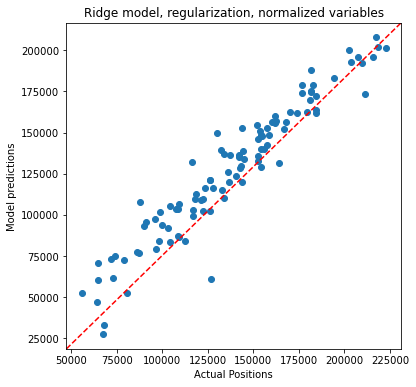

In [19]:
y_pred = ridge.predict(X_train_std)
mae = mean_absolute_error(y_train, y_pred)
string_score = f'MAE on training set: {mae:.2f}'
y_pred = ridge.predict(X_test_std)
mae = mean_absolute_error(y_test, y_pred)
string_score += f'\nMAE on testing set: {mae:.2f}'

fig, ax = plt.subplots(figsize=(6, 6))
plt.scatter(y_test, y_pred)
ax.plot([0, 1], [0, 1], transform=ax.transAxes, ls="--", c="red")

plt.title('Ridge model, regularization, normalized variables')
plt.ylabel('Model predictions')
plt.xlabel('Actual Positions')
print(string_score)

(-0.05244627058970836,
 1.3213716823838757,
 -61632.6278922606,
 55949.30484488314)

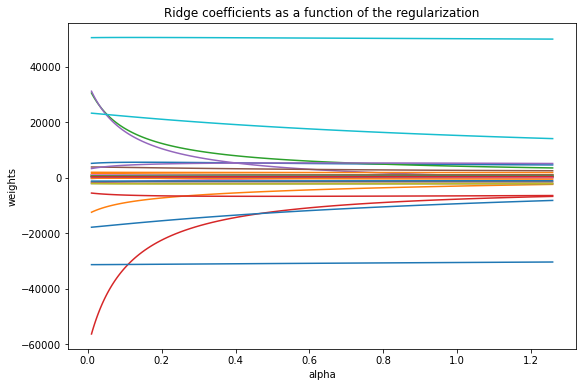

In [20]:
clf = Ridge()

coefs = []
errors = []

alphas = np.logspace(-2,0.1,100)

# Train the model with different regularisation strengths
for a in alphas:
    clf.set_params(alpha=a)
    clf.fit(X_train_std, y_train)
    coefs.append(clf.coef_)
    

plt.figure(figsize=(20, 6))

plt.subplot(121)
ax = plt.gca()
ax.plot(alphas, coefs)
plt.xlabel('alpha')
plt.ylabel('weights')
plt.title('Ridge coefficients as a function of the regularization')
plt.axis('tight')


#### Lasso

In [21]:
from sklearn.linear_model import LassoCV
lasso = LassoCV(max_iter = 10000, alphas = np.logspace(0.1,3,100))
lasso.fit(X_train_std, y_train)

LassoCV(alphas=array([   1.25892541,    1.34676844,    1.44074081,    1.54127022,
          1.64881419,    1.76386217,    1.88693776,    2.0186011 ,
          2.1594514 ,    2.3101297 ,    2.47132176,    2.64376119,
          2.82823278,    3.0255761 ,    3.23668929,    3.46253315,
          3.70413553,    3.96259601,    4.23909088,    4.53487851,
          4.85130507,    5.18981068,    5.55193591,    5.93932887,
          6.35375264,    6.79709332,    7.27136862,    7.77873705,
          8.32150772,    8.90215085,    9....
        161.84187792,  173.13458823,  185.21526088,  198.1388769 ,
        211.96425366,  226.75431259,  242.57636554,  259.50242114,
        277.60951248,  296.98004774,  317.70218523,  339.87023462,
        363.58508612,  388.9546697 ,  416.09444628,  445.12793318,
        476.1872663 ,  509.41380148,  544.95875783,  582.98390597,
        623.66230422,  667.17908629,  713.7323038 ,  763.53382765,
        816.81031231,  873.8042273 ,  934.77496078, 1000.        ]),

In [22]:
np.log(lasso.alpha_)

5.288968183301474

In [23]:
X_train.columns[np.abs(lasso.coef_ - 0) > 1e-4]

Index(['T10Y3M', 'T10Y2Y', 'T10YIE', 'SPX', 'GOLD_price', 'VIX', 'GVZCLS',
       'JPY', 'EUR', 'FF_Mkt', 'FF_SMB', 'FF_MOM', 'Lev_n_S', 'AM_L', 'AM_S',
       'Lev_L', 'SPY Flows'],
      dtype='object')

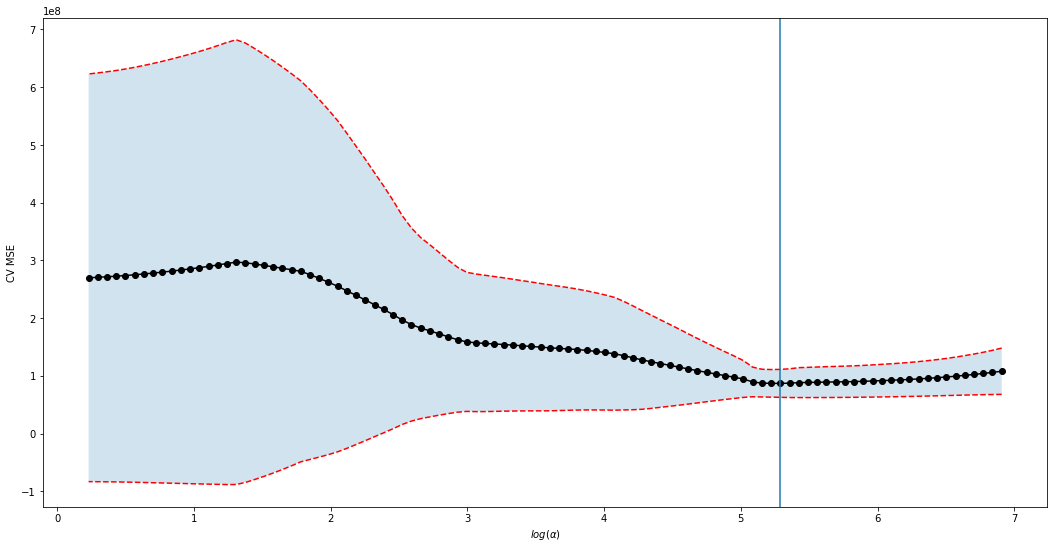

In [24]:
alpha_range = lasso.alphas_
mse_values = lasso.mse_path_.mean(axis = 1)
sd_values = lasso.mse_path_.std(axis = 1)
plt.figure(figsize = [18,9])
plt.plot(np.log(alpha_range), mse_values ,"ko-")
plt.plot(np.log(alpha_range), mse_values + sd_values,"r--")
plt.plot(np.log(alpha_range), mse_values - sd_values,"r--")
plt.fill_between(np.log(alpha_range),
                mse_values + sd_values,
                mse_values - sd_values, alpha = .2)

plt.axvline(np.log(lasso.alpha_))
plt.xlabel(r"$log(\alpha)$")
plt.ylabel("CV MSE");

## Study Positioning Dynamics

In [25]:
data['dNetPos'] = data['AM_NetPos'].diff()
test_data['dNetPos'] = test_data['AM_NetPos'].diff()
data['dNetPos_log_rate'] = np.log(data['AM_NetPos']).diff() 
test_data['dNetPos_log_rate'] = np.log(test_data['AM_NetPos']).diff()

In [26]:
data = data.dropna().reset_index(drop = True)
test_data = test_data.dropna().reset_index(drop = True)

In [27]:
data.columns

Index(['Time', 'AM_NetPos', 'FedFunds', '1Y OIS', 'Libor 3 mo', 'Libor 6 mo',
       'Libor 1Y', 'T10Y3M', 'T10Y2Y', 'T10YIE', 'JNK_Price', 'SPX',
       'WILL5000INDFC', 'NASDAQCOM', 'GOLD_price', 'VIX', 'VXVCLS', 'GVZCLS',
       'JPY', 'EUR', 'USDX_Close', 'DTWEXBGS', 'FF_Mkt', 'FF_SMB', 'FF_HML',
       'FF_MOM', 'Lev_NetPos', 'AM_n_L', 'AM_n_S', 'Lev_n_L', 'Lev_n_S',
       'AM_L', 'AM_S', 'Lev_L', 'Lev_S', 'SPY Flows', 'IVV', 'JNK_Volume',
       'dNetPos', 'dNetPos_log_rate'],
      dtype='object')

In [28]:
p = len(data.columns)
p

40

In [29]:
# For training purpose
time_periods = data['Time']
X_train = data.iloc[:,2:p-2]
y_train = data.iloc[:,-2]
y_train_gr = data.iloc[:,-1]
#y_train_alter = weekly_data.iloc[:,2]
X_test = test_data.iloc[:,2:p-2]
y_test = test_data.iloc[:,-2]
y_test_gr = test_data.iloc[:,-1]
#y_test_alter = test_weekly_data.iloc[:,2]

In [30]:
data['year'] = pd.DatetimeIndex(data['Time']).year

In [31]:
data.columns

Index(['Time', 'AM_NetPos', 'FedFunds', '1Y OIS', 'Libor 3 mo', 'Libor 6 mo',
       'Libor 1Y', 'T10Y3M', 'T10Y2Y', 'T10YIE', 'JNK_Price', 'SPX',
       'WILL5000INDFC', 'NASDAQCOM', 'GOLD_price', 'VIX', 'VXVCLS', 'GVZCLS',
       'JPY', 'EUR', 'USDX_Close', 'DTWEXBGS', 'FF_Mkt', 'FF_SMB', 'FF_HML',
       'FF_MOM', 'Lev_NetPos', 'AM_n_L', 'AM_n_S', 'Lev_n_L', 'Lev_n_S',
       'AM_L', 'AM_S', 'Lev_L', 'Lev_S', 'SPY Flows', 'IVV', 'JNK_Volume',
       'dNetPos', 'dNetPos_log_rate', 'year'],
      dtype='object')

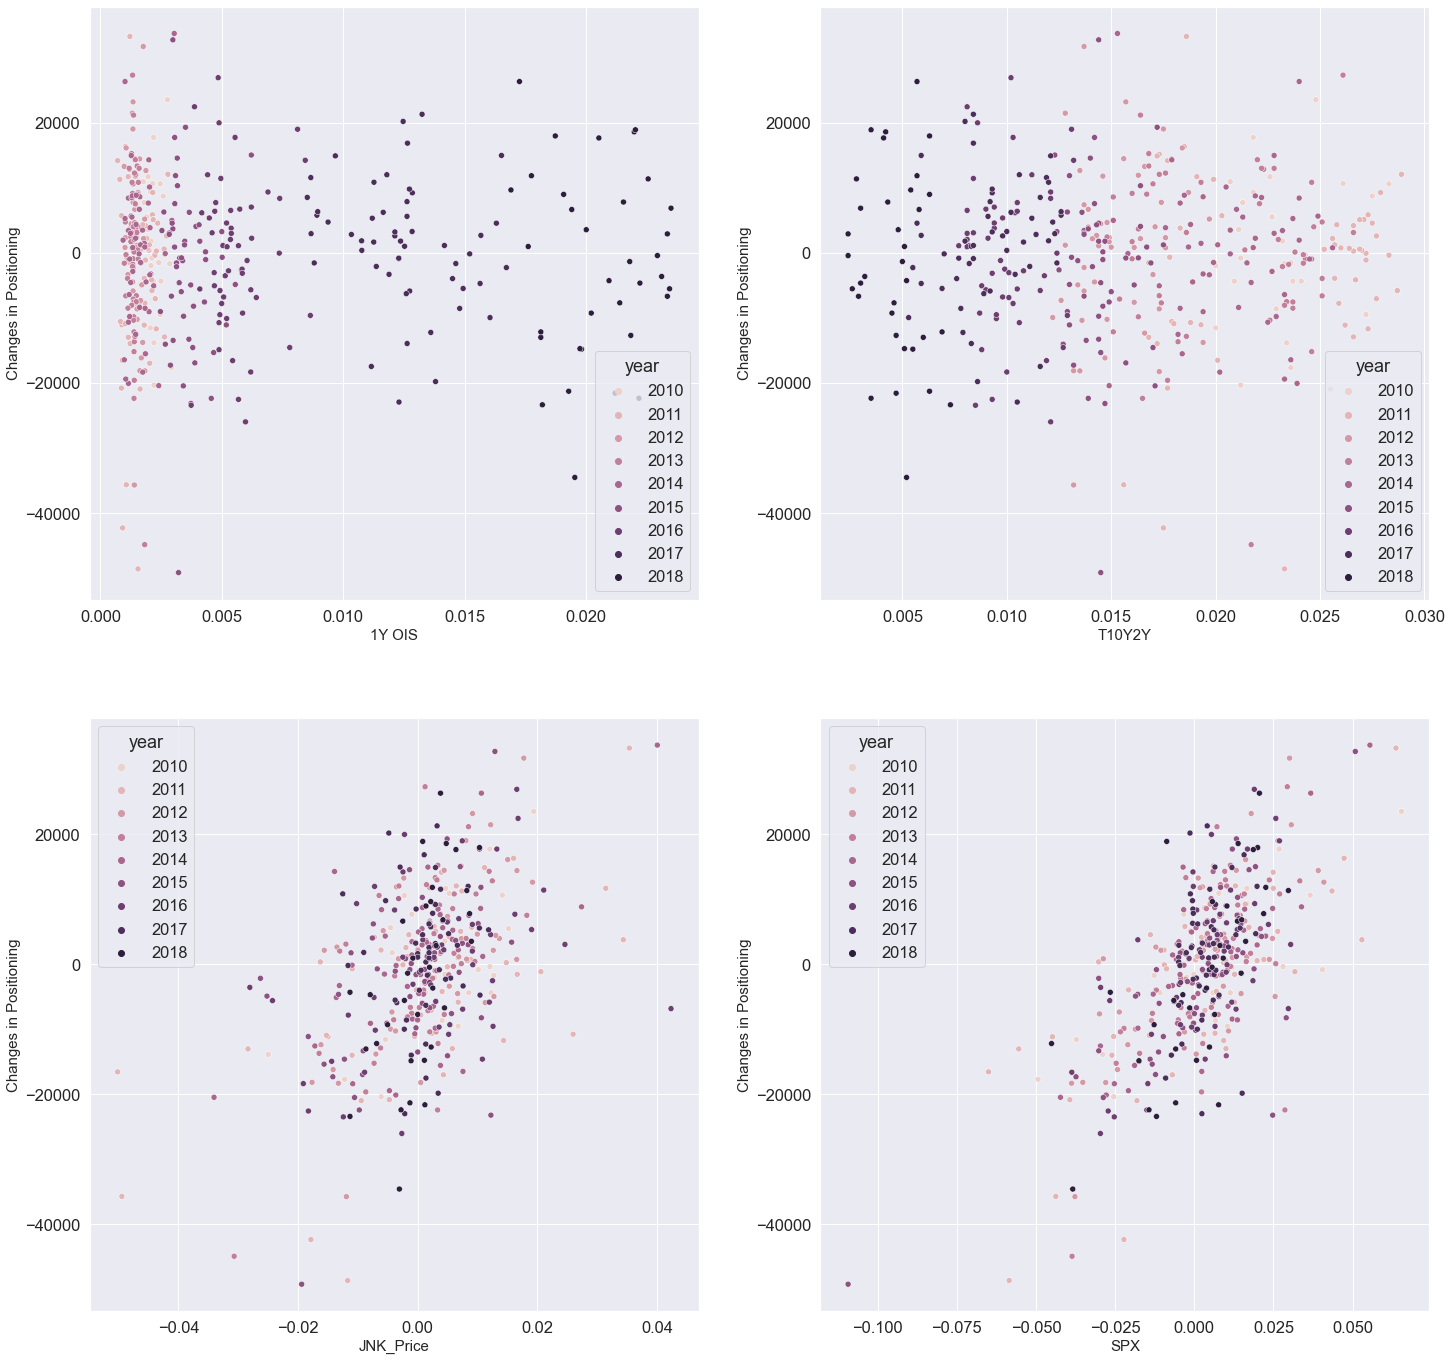

In [32]:
fig = plt.figure(figsize = (24,24))
sns.set(font_scale = 1.5)
axs = fig.subplots(2,2)
picklst = [3, 8, 10, 11]
for i in range(4):
    sns.scatterplot(x=data.iloc[:,picklst[i]], y=data.iloc[:,-3], data=data, hue="year",legend="full", ax=axs[i//2,i%2])
    axs[i//2, i%2].set_ylabel("Changes in Positioning", fontsize = 15)
    axs[i//2, i%2].set_xlabel(data.columns[picklst[i]], fontsize = 15)

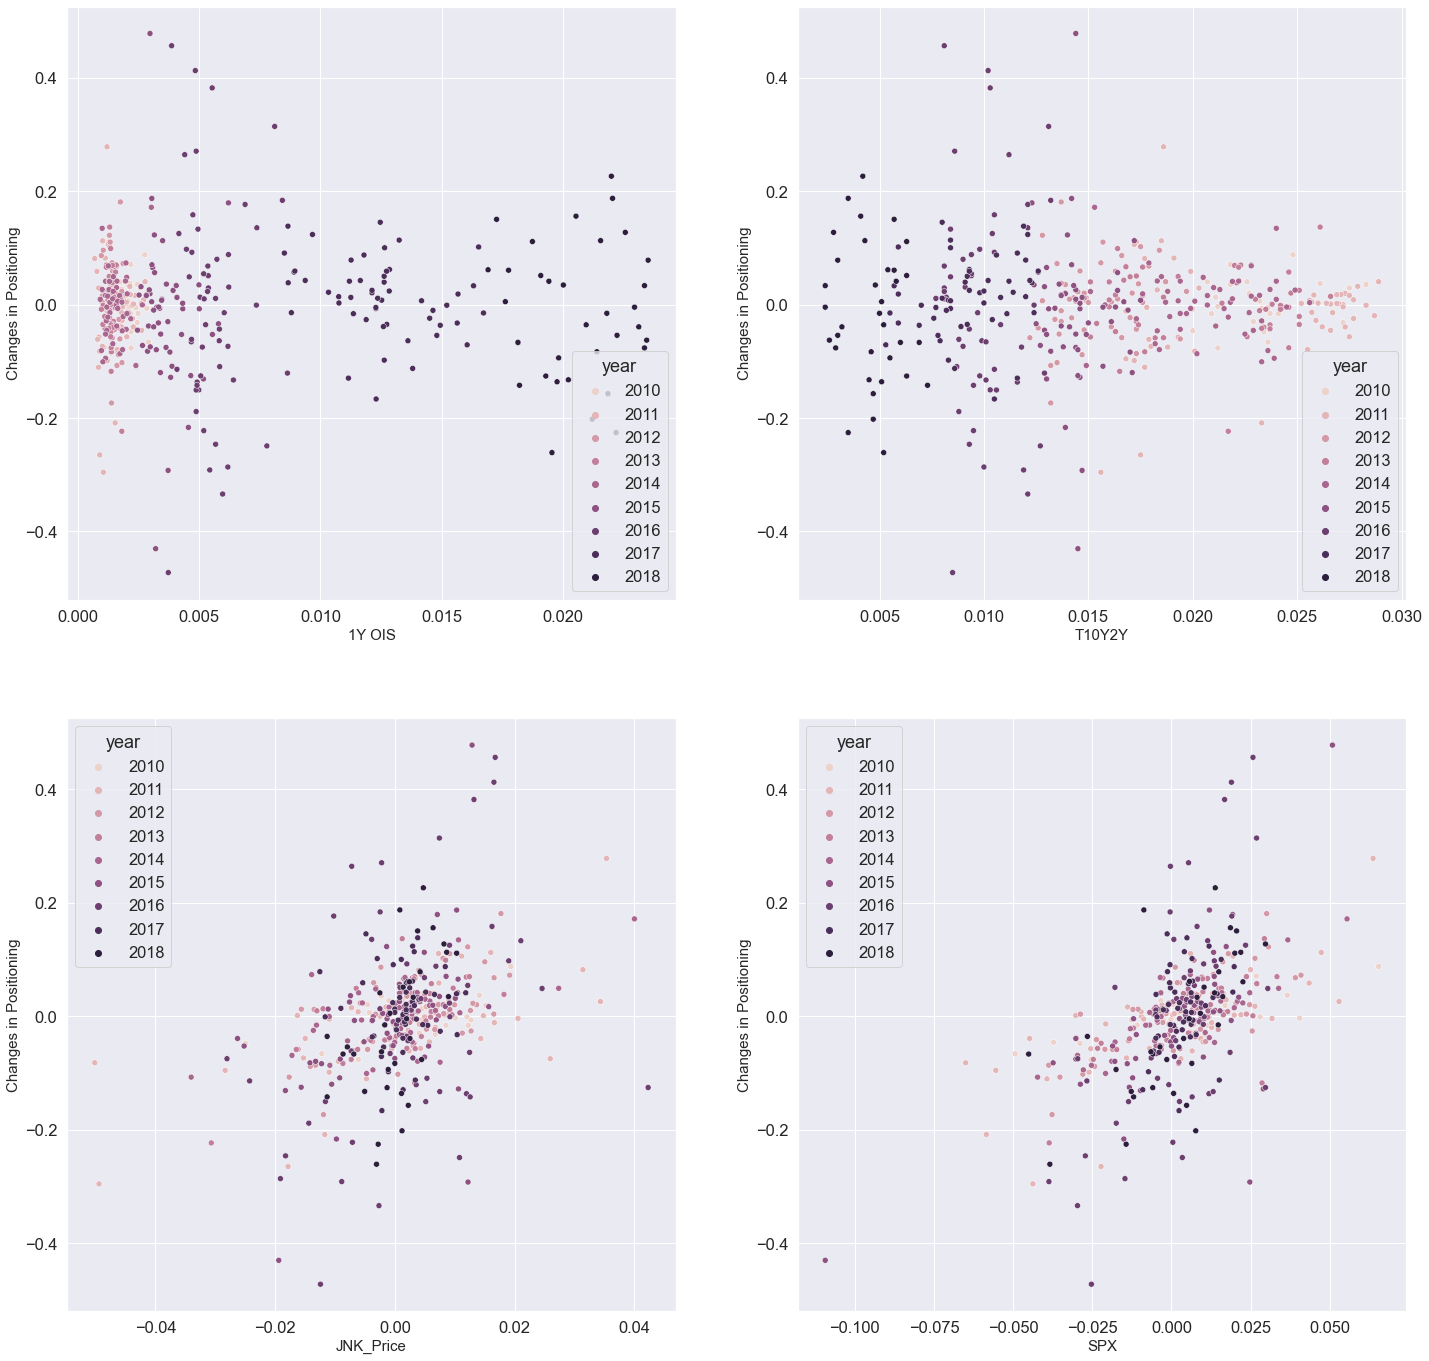

In [33]:
fig = plt.figure(figsize = (24,24))
sns.set(font_scale = 1.5)
axs = fig.subplots(2,2)
picklst = [3, 8, 10, 11]
for i in range(4):
    sns.scatterplot(x=data.iloc[:,picklst[i]], y=data.iloc[:,-2], data=data, hue="year",legend="full", ax=axs[i//2,i%2])
    axs[i//2, i%2].set_ylabel("Changes in Positioning", fontsize = 15)
    axs[i//2, i%2].set_xlabel(data.columns[picklst[i]], fontsize = 15)

### Modeling

For starters, we want to try some basic regression-based model: ridge, lasso, GAM.

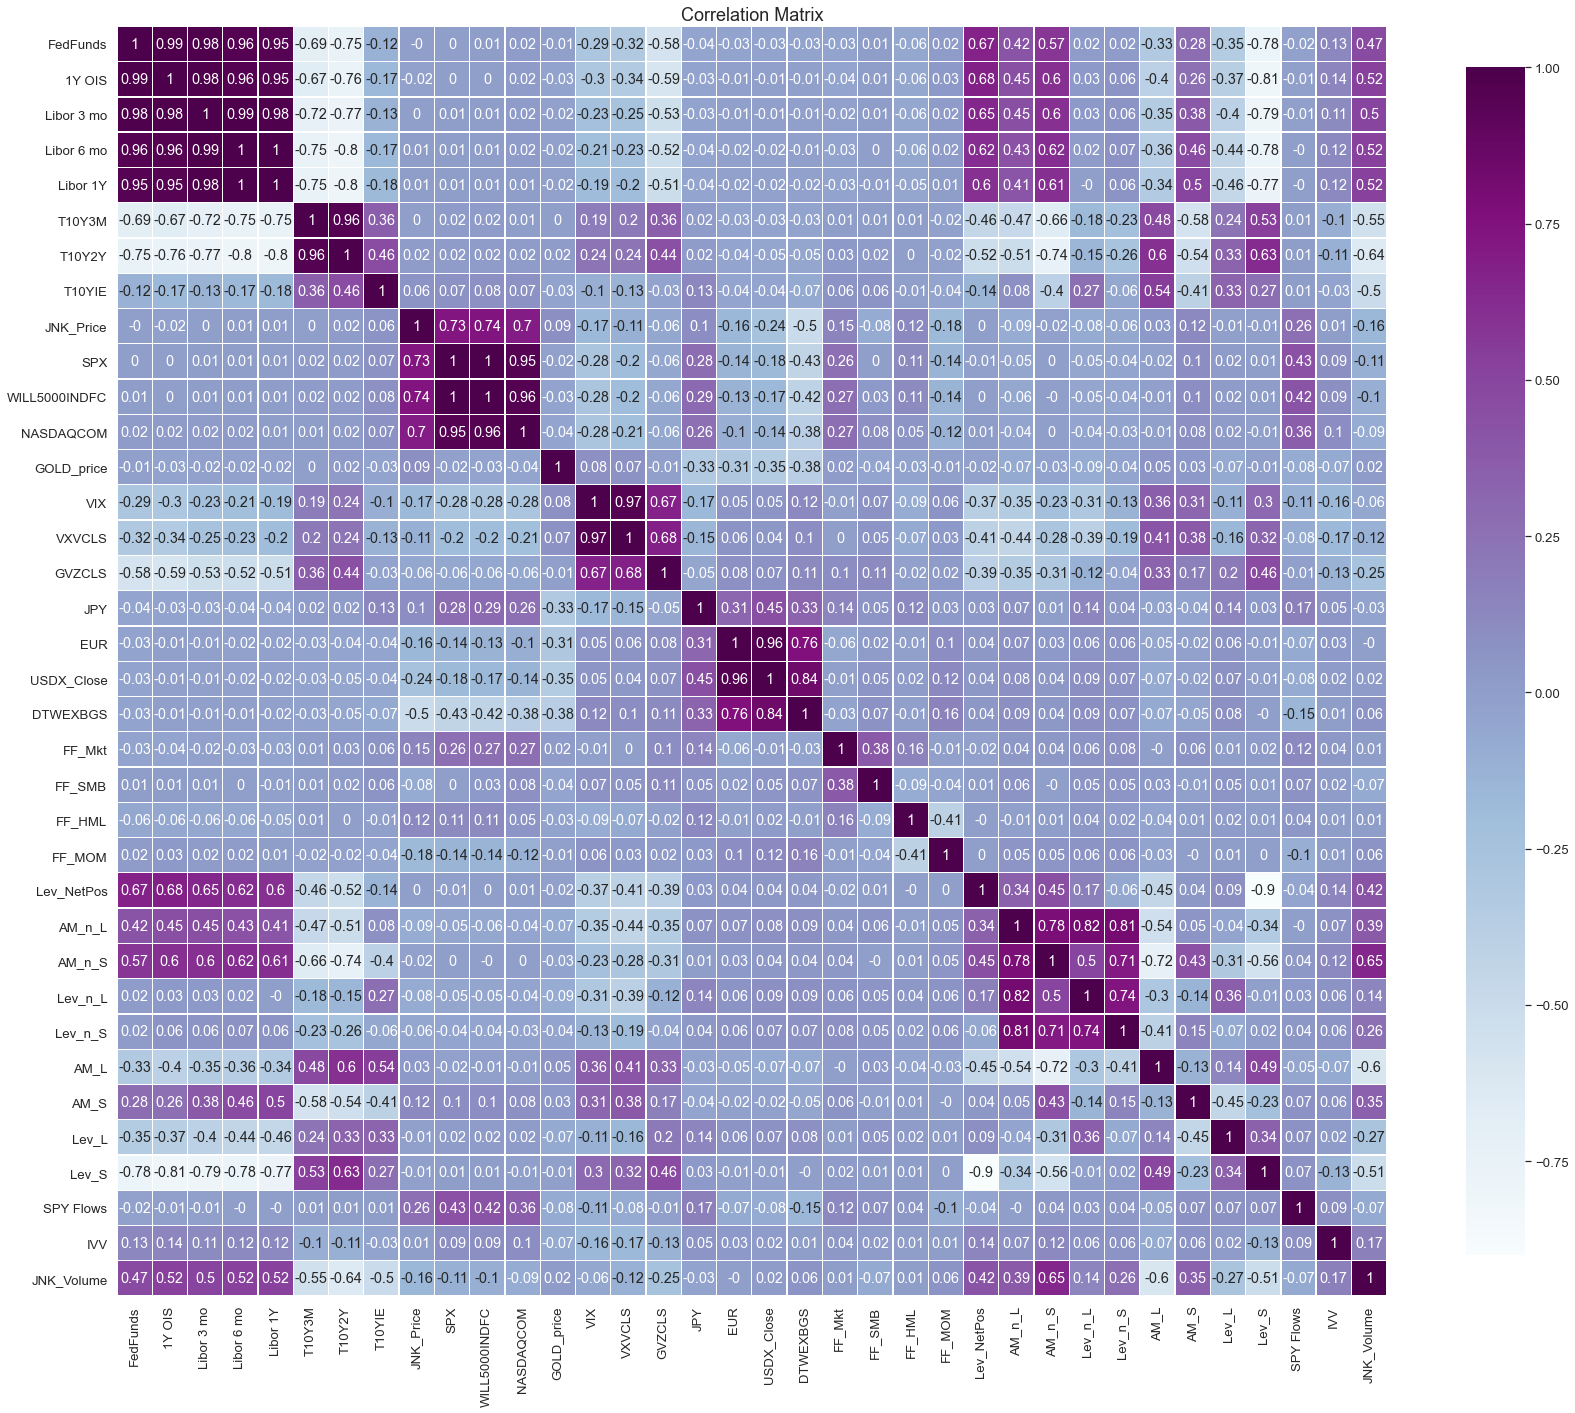

In [34]:
sns.set(font_scale = 1.2)
f, ax = plt.subplots(figsize=(24, 24))
ax = sns.heatmap(np.around(X_train.corr(),2), square=True,linewidths=.3,annot=True,cbar_kws={"shrink": .7}, cmap="BuPu")
plt.tight_layout()
plt.title('Correlation Matrix',size=18)
plt.show()

#### Standardization

In [35]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(X_train)
X_train_std = scaler.transform(X_train)
X_test_std = scaler.transform(X_test)

In [36]:
benchmark_res = pd.DataFrame(index = ['Ridge', 'Lasso', 'Random Forest'], columns = ['MSE', 'MAE'])

#### Ridge

In [37]:
from sklearn.linear_model import RidgeCV, LassoCV
from sklearn.model_selection import RandomizedSearchCV
from sklearn.pipeline import Pipeline
from sklearn.metrics import mean_squared_error, mean_absolute_error

In [38]:
ridge = RidgeCV(alphas = np.linspace(0.1,1,100))
ridge.fit(X_train_std, y_train)

RidgeCV(alphas=array([0.1       , 0.10909091, 0.11818182, 0.12727273, 0.13636364,
       0.14545455, 0.15454545, 0.16363636, 0.17272727, 0.18181818,
       0.19090909, 0.2       , 0.20909091, 0.21818182, 0.22727273,
       0.23636364, 0.24545455, 0.25454545, 0.26363636, 0.27272727,
       0.28181818, 0.29090909, 0.3       , 0.30909091, 0.31818182,
       0.32727273, 0.33636364, 0.34545455, 0.35454545, 0.36363636,
       0.37272727, 0.381818...
       0.69090909, 0.7       , 0.70909091, 0.71818182, 0.72727273,
       0.73636364, 0.74545455, 0.75454545, 0.76363636, 0.77272727,
       0.78181818, 0.79090909, 0.8       , 0.80909091, 0.81818182,
       0.82727273, 0.83636364, 0.84545455, 0.85454545, 0.86363636,
       0.87272727, 0.88181818, 0.89090909, 0.9       , 0.90909091,
       0.91818182, 0.92727273, 0.93636364, 0.94545455, 0.95454545,
       0.96363636, 0.97272727, 0.98181818, 0.99090909, 1.        ]))

In [39]:
ridge.alpha_

0.1

In [40]:
benchmark_res.loc['Ridge', 'MSE'] = mean_squared_error(y_test, ridge.predict(X_test_std))

In [41]:
benchmark_res.loc['Ridge', 'MAE'] =  mean_absolute_error(y_test, ridge.predict(X_test_std))

In [42]:
# alpha_range = ridge.alphas_
# mse_values = ridge.mse_path_.mean(axis = 1)
# sd_values = ridge.mse_path_.std(axis = 1)

# plt.plot(np.log(alpha_range), mse_values ,"k-o")
# plt.plot(np.log(alpha_range), mse_values + sd_values,"r--")
# plt.plot(np.log(alpha_range), mse_values - sd_values,"r--")
# plt.fill_between(np.log(alpha_range),
#                 mse_values + sd_values,
#                 mse_values - sd_values, alpha = .2)

# plt.plot([np.log(ridge.alpha_)]*2, [0,.000045])
# plt.xlabel(r"$log(\alpha)$")
# plt.ylabel("10-Fold CV MSE");

#### Lasso

In [43]:
lasso = LassoCV(max_iter = 10000)
lasso.fit(X_train_std, y_train)

LassoCV(max_iter=10000)

In [44]:
np.log(lasso.alpha_)

5.880205889264608

In [45]:
alpha_range = lasso.alphas_
mse_values = lasso.mse_path_.mean(axis = 1)
sd_values = lasso.mse_path_.std(axis = 1)

In [46]:
alpha_min_ind = np.where(np.abs(np.log(alpha_range) - np.log(lasso.alpha_)) < 1e-4)[0]
alpha_1se_ind = len(mse_values) - np.searchsorted(mse_values[::-1], mse_values[alpha_min_ind]+sd_values[alpha_min_ind])
alpha_1se = alpha_range[alpha_1se_ind]

In [47]:
# 1se
from sklearn.linear_model import Lasso
lasso_1se = Lasso(alpha = alpha_1se, max_iter = 10000)
lasso_1se.fit(X_train_std, y_train)

Lasso(alpha=array([3337.62807469]), max_iter=10000)

In [48]:
benchmark_res.loc['Lasso', 'MSE'] = mean_squared_error(y_test, lasso.predict(X_test_std))
benchmark_res.loc['Lasso', 'MAE'] = mean_absolute_error(y_test, lasso.predict(X_test_std))

In [49]:
benchmark_res.loc['Lasso1se', 'MSE'] = mean_squared_error(y_test, lasso_1se.predict(X_test_std))
benchmark_res.loc['Lasso1se', 'MAE'] = mean_absolute_error(y_test, lasso_1se.predict(X_test_std))

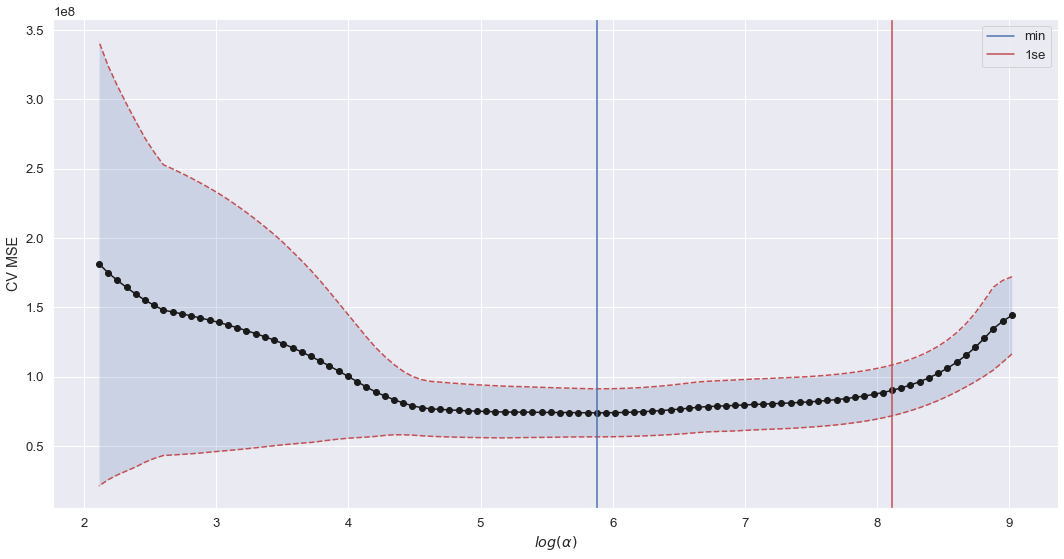

In [50]:
plt.figure(figsize = [18,9])
plt.plot(np.log(alpha_range), mse_values ,"ko-")
plt.plot(np.log(alpha_range), mse_values + sd_values,"r--")
plt.plot(np.log(alpha_range), mse_values - sd_values,"r--")
plt.fill_between(np.log(alpha_range),
                mse_values + sd_values,
                mse_values - sd_values, alpha = .2)

plt.axvline(np.log(lasso.alpha_), label = 'min')
plt.axvline(np.log(alpha_1se), label = '1se', color = 'r')
plt.legend()
plt.xlabel(r"$log(\alpha)$")
plt.ylabel("CV MSE");

__Useful variables selected by LASSO__

In [51]:
X_train.columns[np.abs(lasso.coef_ - 0) > 1e-4]

Index(['SPX', 'GOLD_price', 'VIX', 'EUR', 'FF_Mkt', 'FF_SMB', 'AM_L', 'AM_S',
       'Lev_L', 'SPY Flows', 'JNK_Volume'],
      dtype='object')

In [52]:
X_train.columns[np.abs(lasso_1se.coef_ - 0) > 1e-4]

Index(['SPX'], dtype='object')

#### RandomForest

In [180]:
X_train_std.shape

(422, 36)

In [181]:
from sklearn.ensemble import RandomForestRegressor
rf = RandomForestRegressor(n_estimators = 20)
rf.fit(X_train_std, y_train)

RandomForestRegressor(n_estimators=20)

In [182]:
benchmark_res.loc['Random Forest', 'MSE'] = mean_squared_error(y_test, rf.predict(X_test_std))
benchmark_res.loc['Random Forest', 'MAE'] = mean_absolute_error(y_test, rf.predict(X_test_std))

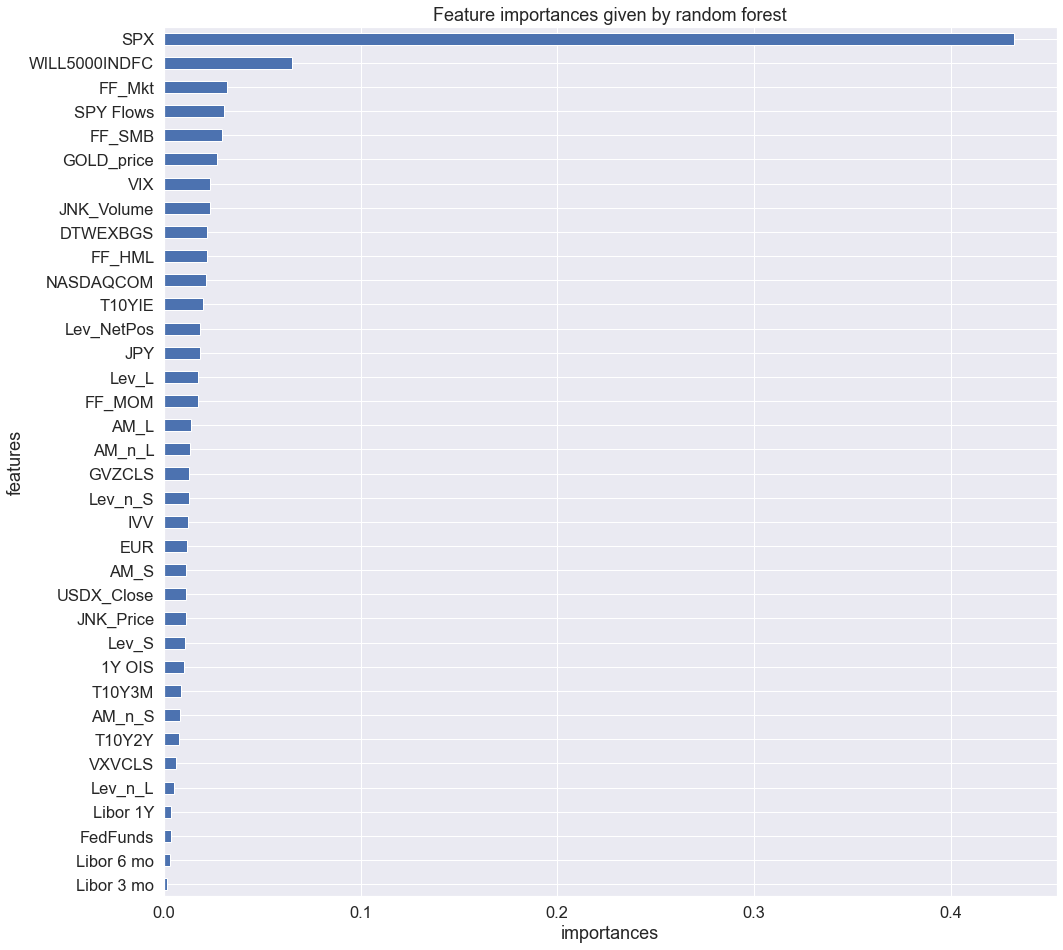

In [187]:
feat_importance = pd.Series(rf.feature_importances_, index = X_train.columns)
sns.set(font_scale = 1.5)
fis = np.argsort(feat_importance)
feat_importance = feat_importance[fis]
fig = plt.figure(figsize = [16,16])
ax = fig.subplots(1,1)
feat_importance.plot(kind = 'barh', ax = ax)
plt.ylabel('features')
plt.xlabel('importances')
plt.title("Feature importances given by random forest")
plt.show()

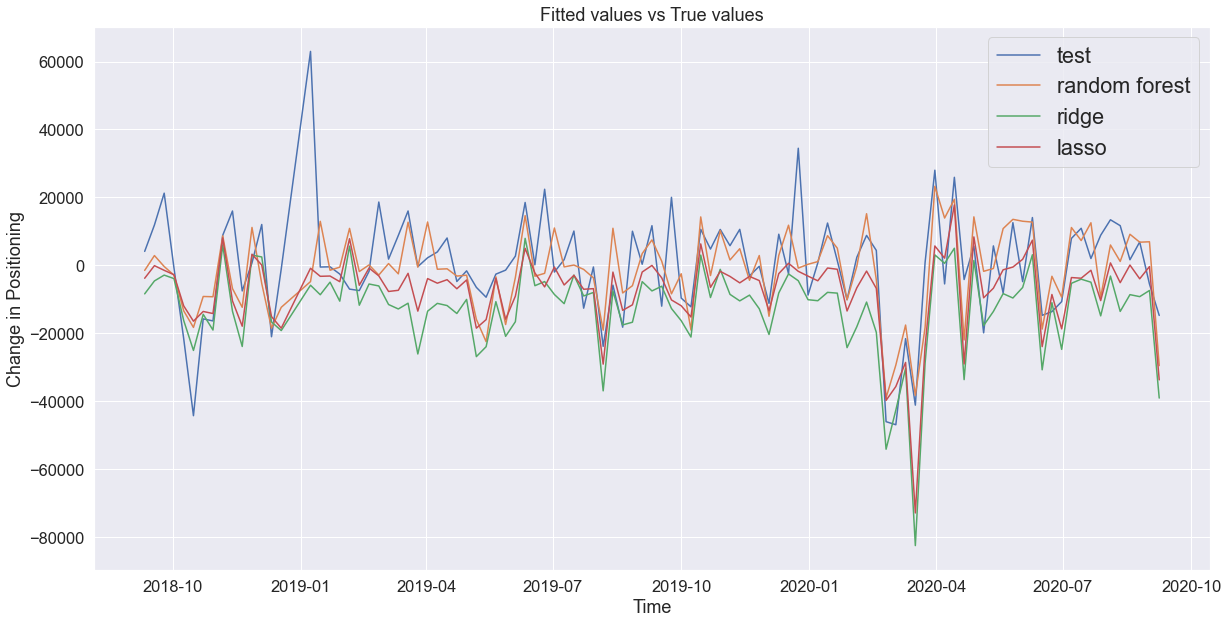

In [188]:
fig = plt.figure(figsize = [20,10])
plt.plot(test_data['Time'], y_test, label = 'test')
plt.plot(test_data['Time'], rf.predict(X_test_std), label = 'random forest')
plt.plot(test_data['Time'], ridge.predict(X_test_std), label = 'ridge')
plt.plot(test_data['Time'], lasso.predict(X_test_std), label = 'lasso')
plt.xlabel("Time")
plt.ylabel("Change in Positioning")
plt.title('Fitted values vs True values')
plt.legend(fontsize = 'large')

In [189]:
benchmark_res

,MSE,MAE
Ridge,3.05553e+08,14002.2
Lasso,1.99105e+08,10581.9
Random Forest,1.70039e+08,9257.74
Lasso1se,1.60699e+08,9077.16
Random Forest Tuning,1.58239e+08,9007.77
Elastic Net,1.98536e+08,10560.9


#### Random Forest With Tuning

In [66]:
from sklearn.model_selection import RandomizedSearchCV,GridSearchCV
p = X_train_std.shape[1]
param_grids_random = {
    'max_depth': np.arange(1,12), 
    'max_features': np.arange(1,p)
}

In [67]:
random_grid_search = RandomizedSearchCV(estimator = rf, param_distributions = param_grids_random, scoring='neg_mean_absolute_error', cv=5, n_iter = 150).fit(X_train_std, y_train)

In [190]:
random_grid_search.best_params_

{'max_features': 9, 'max_depth': 5}

By random grid search, the best parameter for random forest is {'max_features': 9, 'max_depth': 5}

In [191]:
benchmark_res.loc['Random Forest Tuning', 'MSE'] = mean_squared_error(y_test, random_grid_search.predict(X_test_std))
benchmark_res.loc['Random Forest Tuning', 'MAE'] = mean_absolute_error(y_test, random_grid_search.predict(X_test_std))

In [192]:
benchmark_res

,MSE,MAE
Ridge,3.05553e+08,14002.2
Lasso,1.99105e+08,10581.9
Random Forest,1.70039e+08,9257.74
Lasso1se,1.60699e+08,9077.16
Random Forest Tuning,1.58239e+08,9007.77
Elastic Net,1.98536e+08,10560.9


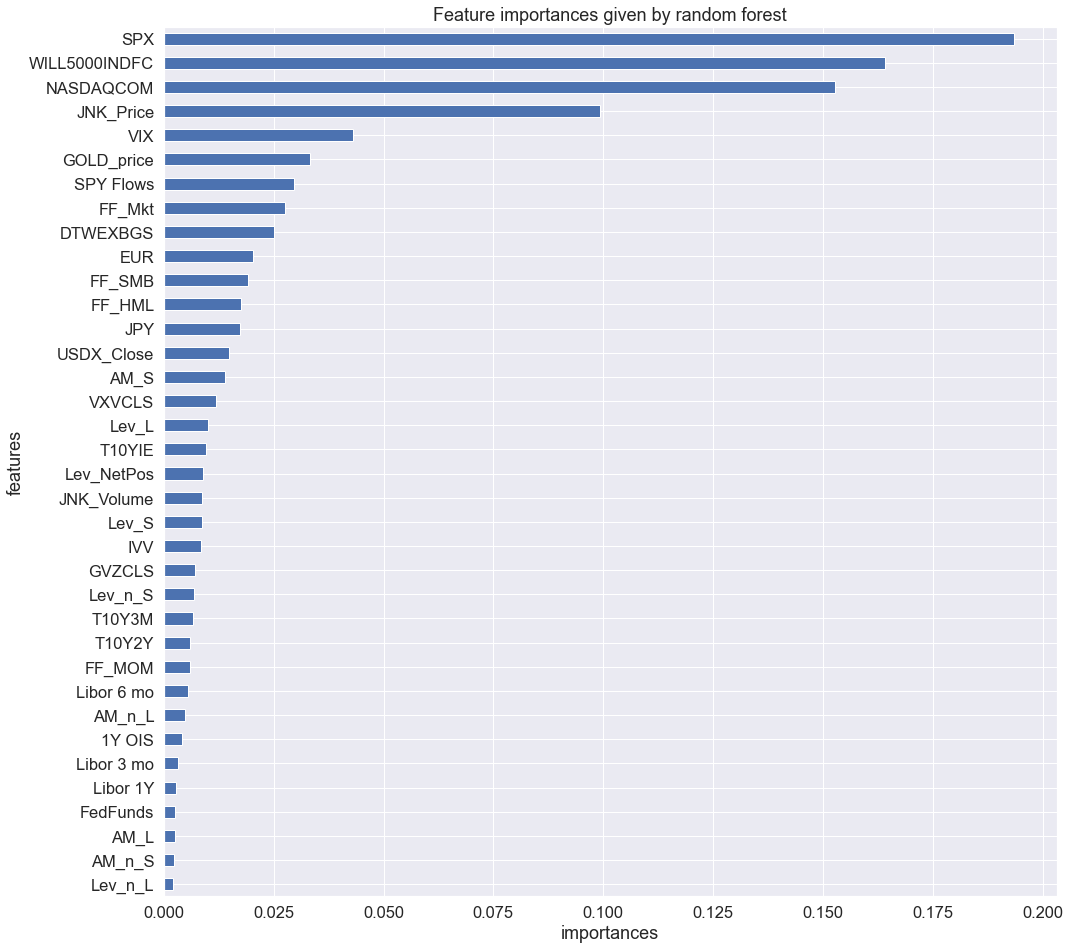

In [193]:
feat_importance = pd.Series(random_grid_search.best_estimator_.feature_importances_, index = X_train.columns)
fis = np.argsort(feat_importance)
feat_importance = feat_importance[fis]
fig = plt.figure(figsize = [16,16])
ax = fig.subplots(1,1)
feat_importance.plot(kind = 'barh', ax = ax)
plt.ylabel('features')
plt.xlabel('importances')
plt.title("Feature importances given by random forest")
plt.show()

In [251]:
X_test.columns

Index(['FedFunds', '1Y OIS', 'Libor 3 mo', 'Libor 6 mo', 'Libor 1Y', 'T10Y3M',
       'T10Y2Y', 'T10YIE', 'JNK_Price', 'SPX', 'WILL5000INDFC', 'NASDAQCOM',
       'GOLD_price', 'VIX', 'VXVCLS', 'GVZCLS', 'JPY', 'EUR', 'USDX_Close',
       'DTWEXBGS', 'FF_Mkt', 'FF_SMB', 'FF_HML', 'FF_MOM', 'Lev_NetPos',
       'AM_n_L', 'AM_n_S', 'Lev_n_L', 'Lev_n_S', 'AM_L', 'AM_S', 'Lev_L',
       'Lev_S', 'SPY Flows', 'IVV', 'JNK_Volume'],
      dtype='object')

Text(0, 0.5, 'Fitted Data')

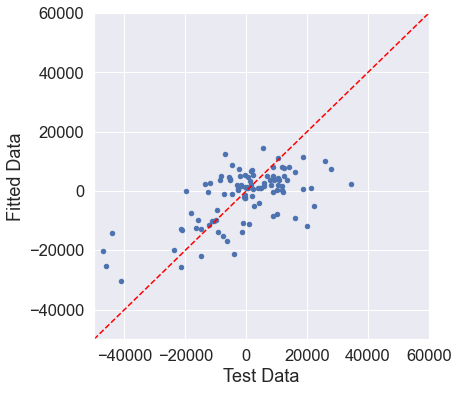

In [250]:
fig = plt.figure(figsize = [6,6])
ax = fig.subplots(1,1)
ax.scatter(y_test, random_grid_search.predict(X_test_std), s = 20)
ax.plot([0, 1], [0, 1], transform=ax.transAxes, ls="--", c="red")
ax.set(xlim=(-50000, 60000), ylim=(-50000, 60000))
ax.set_xlabel("Test Data")
ax.set_ylabel("Fitted Data")

We can see our model tends to overestimate the change in positioning data.

#### Elastic Net

In [125]:
from sklearn.linear_model import ElasticNetCV
elastic = ElasticNetCV(l1_ratio = np.linspace(0.4, 1, 50), alphas = np.logspace(1,10,500, base = np.exp(1)), max_iter = 10000)
elastic.fit(X_train_std, y_train)

ElasticNetCV(alphas=array([2.71828183e+00, 2.76775375e+00, 2.81812605e+00, 2.86941512e+00,
       2.92163762e+00, 2.97481056e+00, 3.02895124e+00, 3.08407725e+00,
       3.14020655e+00, 3.19735738e+00, 3.25554834e+00, 3.31479835e+00,
       3.37512670e+00, 3.43655301e+00, 3.49909726e+00, 3.56277980e+00,
       3.62762134e+00, 3.69364297e+00, 3.76086618e+00, 3.82931284e+00,
       3.89900520e+00, 3.969965...
       0.58367347, 0.59591837, 0.60816327, 0.62040816, 0.63265306,
       0.64489796, 0.65714286, 0.66938776, 0.68163265, 0.69387755,
       0.70612245, 0.71836735, 0.73061224, 0.74285714, 0.75510204,
       0.76734694, 0.77959184, 0.79183673, 0.80408163, 0.81632653,
       0.82857143, 0.84081633, 0.85306122, 0.86530612, 0.87755102,
       0.88979592, 0.90204082, 0.91428571, 0.92653061, 0.93877551,
       0.95102041, 0.96326531, 0.9755102 , 0.9877551 , 1.        ]),
             max_iter=10000)

In [126]:
np.log(elastic.alpha_)

5.887775551102204

In [127]:
elastic.l1_ratio_

1.0

In [128]:
benchmark_res.loc['Elastic Net', 'MSE'] = mean_squared_error(y_test, elastic.predict(X_test_std))
benchmark_res.loc['Elastic Net', 'MAE'] = mean_absolute_error(y_test, elastic.predict(X_test_std))

In [129]:
benchmark_res

,MSE,MAE
Ridge,3.05553e+08,14002.2
Lasso,1.99105e+08,10581.9
Random Forest,1.74238e+08,9489.48
Lasso1se,1.60699e+08,9077.16
Random Forest Tuning,1.58239e+08,9007.77
Elastic Net,1.98536e+08,10560.9


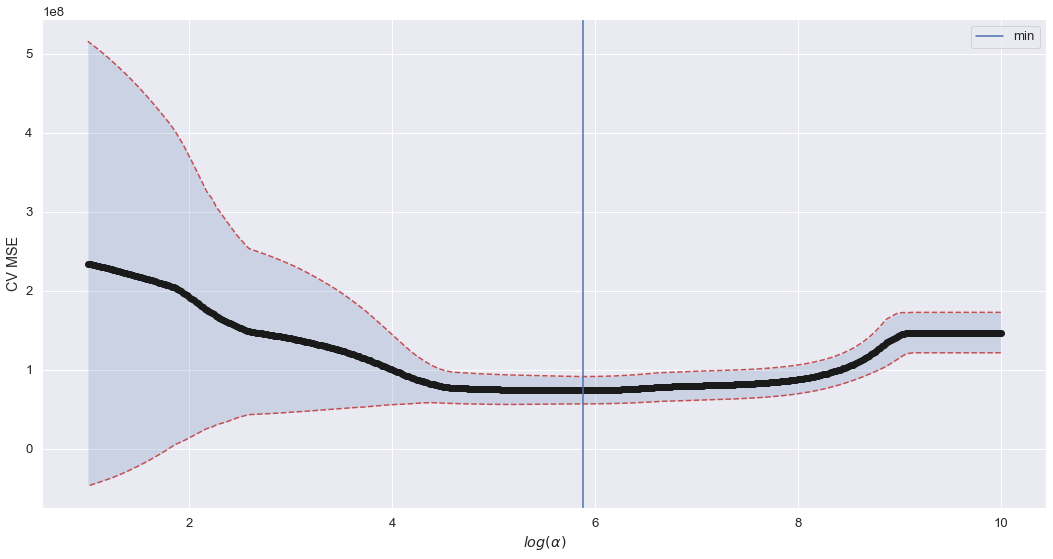

In [136]:
alpha_range = elastic.alphas_
mse_values = elastic.mse_path_[-1,:,:].mean(axis = 1)
sd_values = elastic.mse_path_[-1,:,:].std(axis = 1)
plt.figure(figsize = [18,9])
plt.plot(np.log(alpha_range), mse_values ,"ko-")
plt.plot(np.log(alpha_range), mse_values + sd_values,"r--")
plt.plot(np.log(alpha_range), mse_values - sd_values,"r--")
plt.fill_between(np.log(alpha_range),
                mse_values + sd_values,
                mse_values - sd_values, alpha = .2)

plt.axvline(np.log(lasso.alpha_), label = 'min')
plt.legend()
plt.xlabel(r"$log(\alpha)$")
plt.ylabel("CV MSE");

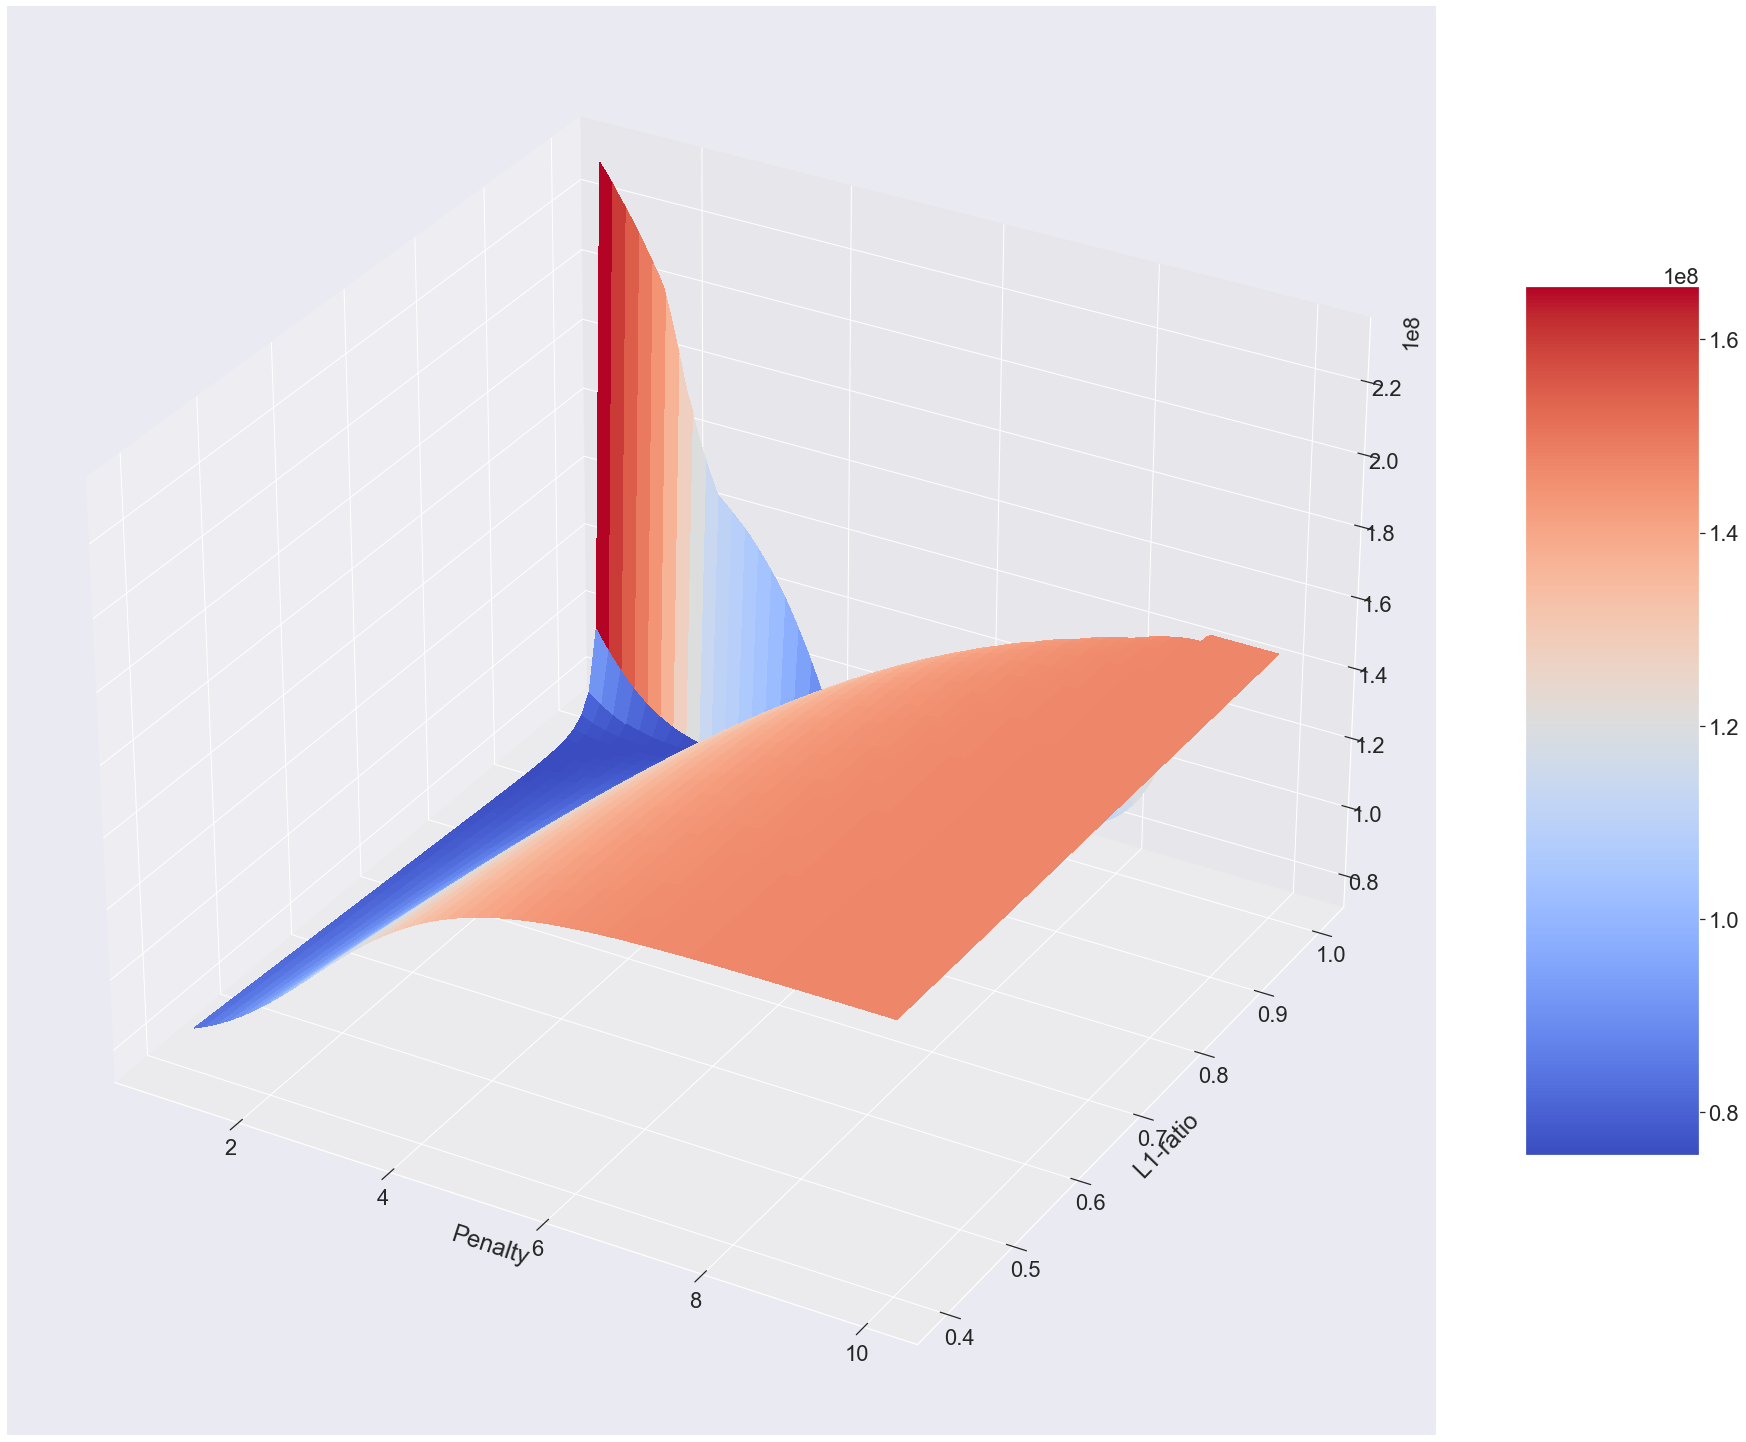

In [159]:
from matplotlib import cm
from matplotlib.ticker import LinearLocator, FormatStrFormatter
sns.set(font_scale = 2)
fig = plt.figure(figsize = [32,32])
ax = fig.gca(projection='3d')

# Make data.
X = np.log(elastic.alphas_)
Y = np.linspace(0.4, 1, 50)
X, Y = np.meshgrid(X, Y)
Z = elastic.mse_path_.mean(axis = 2)

# Plot the surface.
surf = ax.plot_surface(X, Y, Z, cmap=cm.coolwarm,
                       linewidth=0, antialiased=False)

# Customize the z axis.
#ax.set_zlim(-1.01, 1.01)
# ax.zaxis.set_major_locator(LinearLocator(10))
# ax.zaxis.set_major_formatter(FormatStrFormatter('%.02f'))
ax.set_xlabel("Penalty")
ax.set_ylabel("L1-ratio")
# Add a color bar which maps values to colors.
fig.colorbar(surf, shrink=0.5, aspect=5)

plt.show()

#### Examine those important variables

In [177]:
lasso_pick = X_train.columns[np.abs(lasso.coef_ - 0) > 1e-4]
lasso_pick

Index(['SPX', 'GOLD_price', 'VIX', 'EUR', 'FF_Mkt', 'FF_SMB', 'AM_L', 'AM_S',
       'Lev_L', 'SPY Flows', 'JNK_Volume'],
      dtype='object')

In [198]:
rf_pick = feat_importance[-10:].index
rf_pick

Index(['EUR', 'DTWEXBGS', 'FF_Mkt', 'SPY Flows', 'GOLD_price', 'VIX',
       'JNK_Price', 'NASDAQCOM', 'WILL5000INDFC', 'SPX'],
      dtype='object')

In [200]:
common_pick = set(rf_pick).intersection(set(lasso_pick))
common_pick

{'EUR', 'FF_Mkt', 'GOLD_price', 'SPX', 'SPY Flows', 'VIX'}

In [201]:
X_train.columns

Index(['FedFunds', '1Y OIS', 'Libor 3 mo', 'Libor 6 mo', 'Libor 1Y', 'T10Y3M',
       'T10Y2Y', 'T10YIE', 'JNK_Price', 'SPX', 'WILL5000INDFC', 'NASDAQCOM',
       'GOLD_price', 'VIX', 'VXVCLS', 'GVZCLS', 'JPY', 'EUR', 'USDX_Close',
       'DTWEXBGS', 'FF_Mkt', 'FF_SMB', 'FF_HML', 'FF_MOM', 'Lev_NetPos',
       'AM_n_L', 'AM_n_S', 'Lev_n_L', 'Lev_n_S', 'AM_L', 'AM_S', 'Lev_L',
       'Lev_S', 'SPY Flows', 'IVV', 'JNK_Volume'],
      dtype='object')

In [207]:
pickout = np.arange(len(X_train.columns))[np.isin(X_train.columns, np.array([i for i in common_pick]))]
pickout

array([ 9, 12, 13, 17, 20, 33])

In [208]:
X_train.columns[pickout]

Index(['SPX', 'GOLD_price', 'VIX', 'EUR', 'FF_Mkt', 'SPY Flows'], dtype='object')

In [223]:
X_train_std_sel = X_train_std[:,pickout]
X_test_std_sel = X_test_std[:,pickout]

In [228]:
from pygam import LinearGAM, s,l,f,te
gam = LinearGAM(s(0)+s(1)+s(2)+s(3)+s(4)+s(5)).gridsearch(X_train_std_sel, y_train, lam = [np.logspace(-2, 3, 5)]*6)

100% (15625 of 15625) |##################| Elapsed Time: 0:10:51 Time:  0:10:51


In [239]:
import pickle
with open('gam_model.pkl', 'wb') as fw:
    pickle.dump(gam, fw, 0)

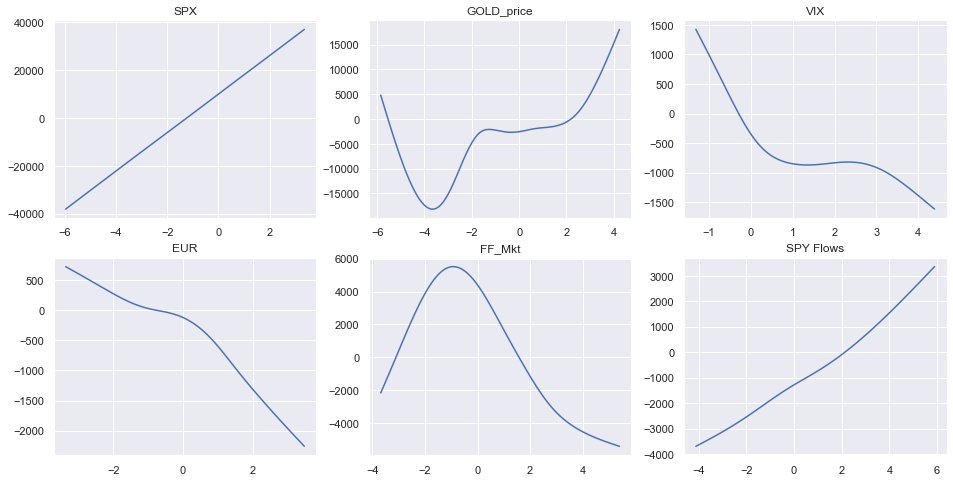

In [243]:
fig = plt.figure(figsize = [16,8])
sns.set(font_scale = 1)
axs = fig.subplots(2, len(pickout)//2)
titles = X_train.columns[pickout]

for i in range(len(pickout)):
    Xfake = gam.generate_X_grid(term = i)
    #Xback = scaler.inverse_transform(Xfake)
    pdep, confi = gam.partial_dependence(term = i, X= Xfake, width=.95)

    axs[i//3, i%3].plot(Xfake[:, i], pdep)
    #ax.plot(XX[:, i], confi[0], c='r', ls='--')
    axs[i//3, i%3].set_title(titles[i])

plt.show()

In [237]:
benchmark_res.loc['GAM', 'MSE'] = mean_squared_error(y_test, gam.predict(X_test_std_sel))
benchmark_res.loc['GAM', 'MAE'] = mean_absolute_error(y_test, gam.predict(X_test_std_sel))

In [238]:
benchmark_res

,MSE,MAE
Ridge,3.05553e+08,14002.2
Lasso,1.99105e+08,10581.9
Random Forest,1.70039e+08,9257.74
Lasso1se,1.60699e+08,9077.16
Random Forest Tuning,1.58239e+08,9007.77
Elastic Net,1.98536e+08,10560.9
GAM,1.50386e+08,8824.2


[(-50000.0, 60000.0), (-50000.0, 60000.0)]

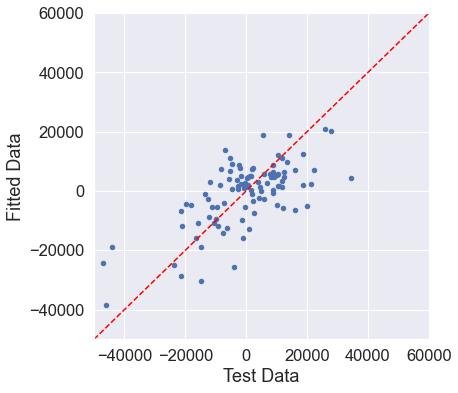

In [249]:
fig = plt.figure(figsize = [6,6])
ax = fig.subplots(1,1)
ax.scatter(y_test, gam.predict(X_test_std_sel), s = 20)
ax.plot([0, 1], [0, 1], transform=ax.transAxes, ls="--", c="red")
ax.set_xlabel("Test Data")
ax.set_ylabel("Fitted Data")
ax.set(xlim=(-50000, 60000), ylim=(-50000, 60000))

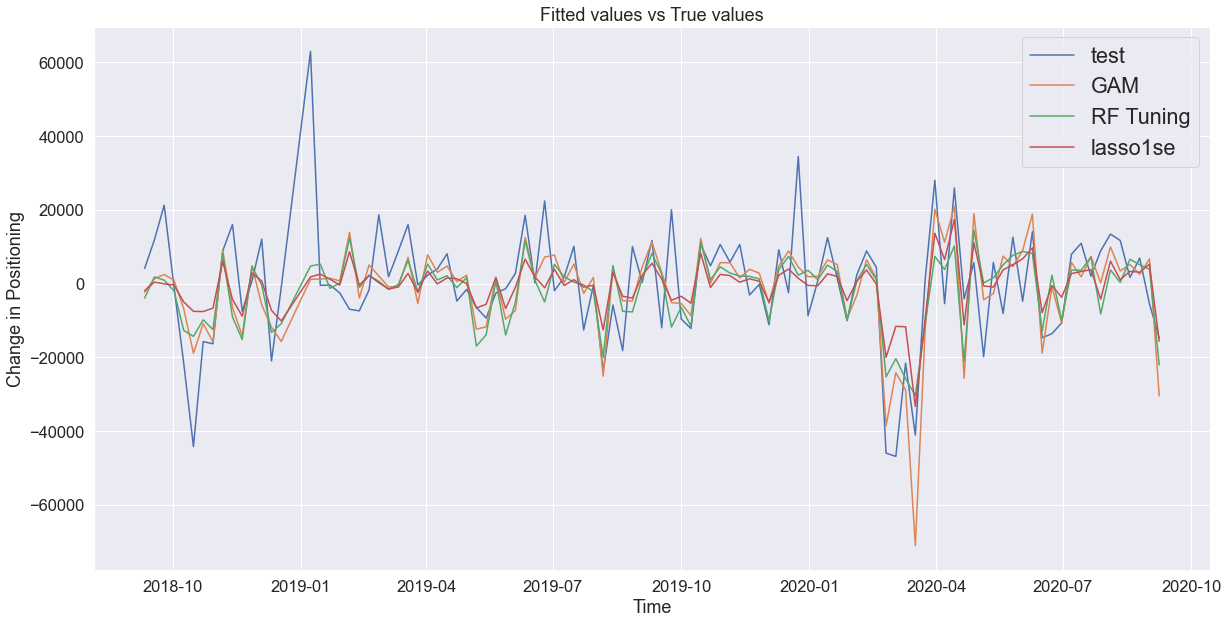

In [247]:
fig = plt.figure(figsize = [20,10])
sns.set(font_scale = 1.5)
plt.plot(test_data['Time'], y_test, label = 'test')
plt.plot(test_data['Time'], gam.predict(X_test_std_sel), label = 'GAM')
plt.plot(test_data['Time'], random_grid_search.predict(X_test_std), label = 'RF Tuning')
plt.plot(test_data['Time'], lasso_1se.predict(X_test_std), label = 'lasso1se')
plt.xlabel("Time")
plt.ylabel("Change in Positioning")
plt.title('Fitted values vs True values')
plt.legend(fontsize = 'large')

In [259]:
np.abs(y_test).mean()

10982.805825242718

In [260]:
np.abs(y_test).std()

11155.629317601515

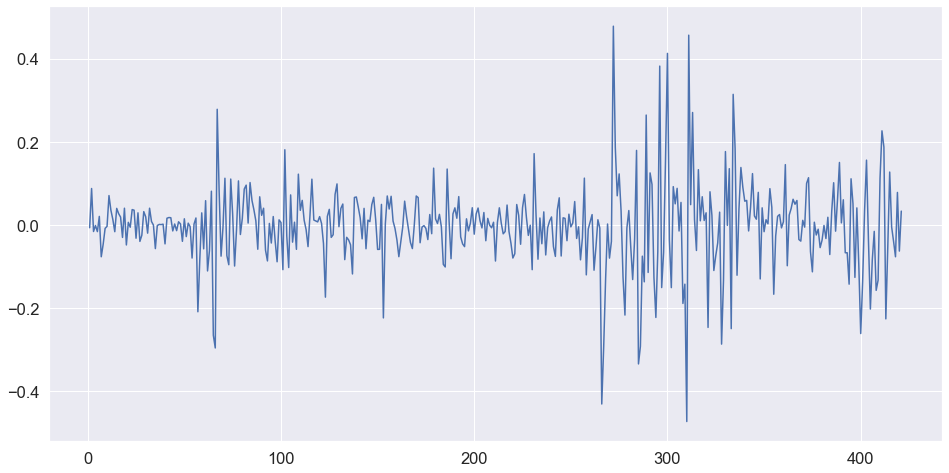

In [256]:
fig = plt.figure(figsize = [16,8])
plt.plot(np.log(data.AM_NetPos).diff())

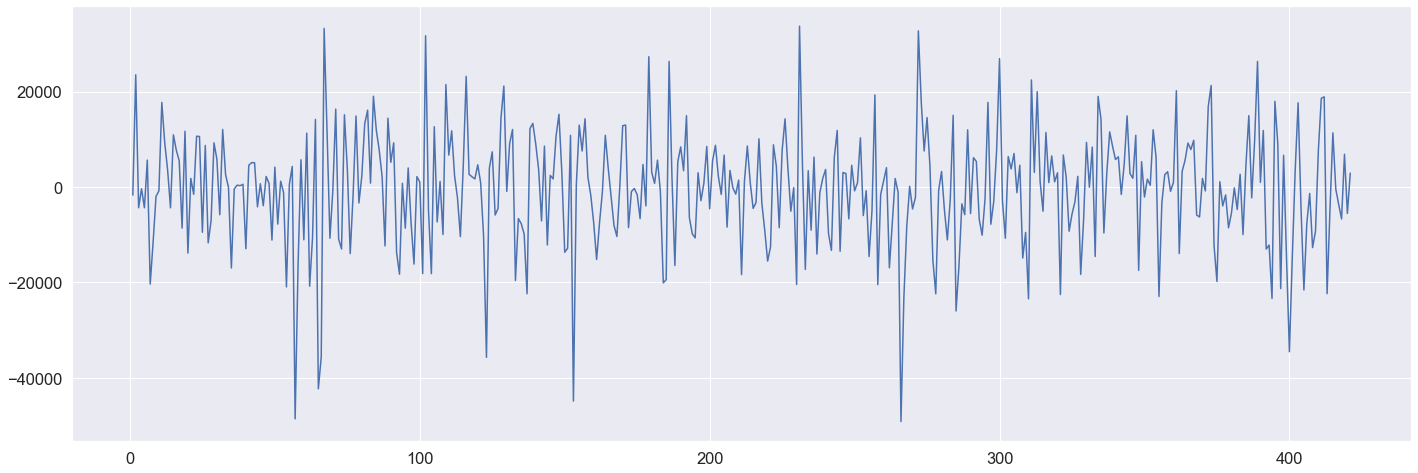

In [258]:
fig = plt.figure(figsize = [24,8])
plt.plot(data.AM_NetPos.diff())